# About Me

**Mohammed Imam Uddin Riad**  
**Data Analyst**

**Connect With Me**
- [Portfolio](https://mriadg.github.io/MohammedRiad.com/)
- [LinkedIn](https://www.linkedin.com/in/mohammed-imam-uddin-riad-1b7b682ab/)
- [Email Me](mailto:imamuddinriad@gmail.com)



# Project:Google Play Store Apps

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv("googleplaystore.csv")
df = raw_data.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [6]:
df.shape

(10841, 13)

## Checking for the duplicates and removing duplicates if any

In [7]:
df.duplicated().sum()

483

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [9]:
df.shape

(10358, 13)

### Missing values

In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

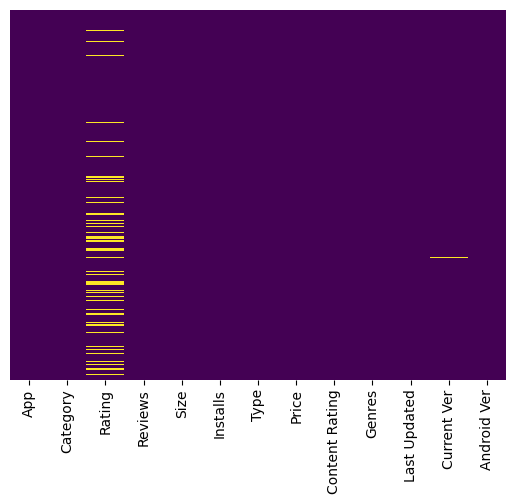

In [11]:
### Plot Missing Values
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

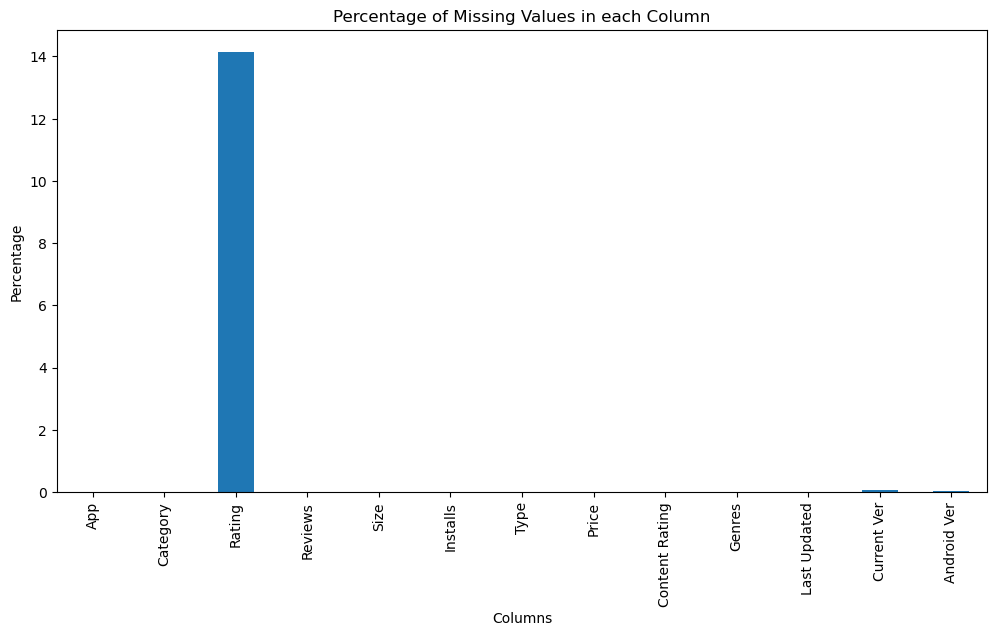

In [13]:
import matplotlib.pyplot as plt
# make figure size
plt.figure(figsize=(12, 6))

# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')

# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [14]:
#filling 'Rating column's' nan with mean of the columns 'Rating'
df['Rating'].fillna(df['Rating'].mean(),inplace = True)
df['Rating'].isnull().sum()

C:\Users\Mohammed Riad\AppData\Local\Temp\ipykernel_10916\1287123280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(),inplace = True)


0

In [15]:
#dropping rest of the rows with missing values as the number of rows with missing value is overall 12
df.dropna(inplace = True)
df.isnull().sum(),df.shape

(App               0
 Category          0
 Rating            0
 Reviews           0
 Size              0
 Installs          0
 Type              0
 Price             0
 Content Rating    0
 Genres            0
 Last Updated      0
 Current Ver       0
 Android Ver       0
 dtype: int64,
 (10346, 13))

### Changing the data type of 'Reviews' column

In [16]:
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].dtype

dtype('int32')

In [17]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10346, dtype: int32

In [18]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated'].dtype

dtype('<M8[ns]')

### Changing the data type of 'Price' column

In [19]:
import numpy as np
df['Price'] = df['Price'].str.replace('$',"",regex = False)
df['Price'] = df['Price'].astype(np.float64)
df['Price'].dtype

dtype('float64')

### Changing the data type of 'Installs' column

In [20]:
df['Installs']= df['Installs'].str.replace('+','',regex = False).str.replace(',','',regex = False)
df['Installs']= df['Installs'].astype(np.int32)
df['Installs'].dtype

dtype('int32')

### Changing the data type of 'Size' column

In [21]:
df['Size']=df['Size'].str.replace('M','',regex = False)


#df['Size'].astype(np.float64)

In [22]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201k', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '23k', '6.5', '1.5', '7.5', '51',
       '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8',
       '8.8', '6.6', '5.1', '61', '66', '79k', '8.4', '118k', '44',
       '695k', '1.6', '6.2', '18k', '53', '1.4', '3.0', '5.8', '3.8',
       '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9', '9.3',
  

In [23]:
df_cleaned = df.copy()

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int32         
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  int32         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.0+ MB


## EDA

### Counts of App by Category

In [26]:
df_cleaned['Category'].unique().size

33

<Axes: title={'center': 'Counts of App by Category'}, xlabel='Category'>

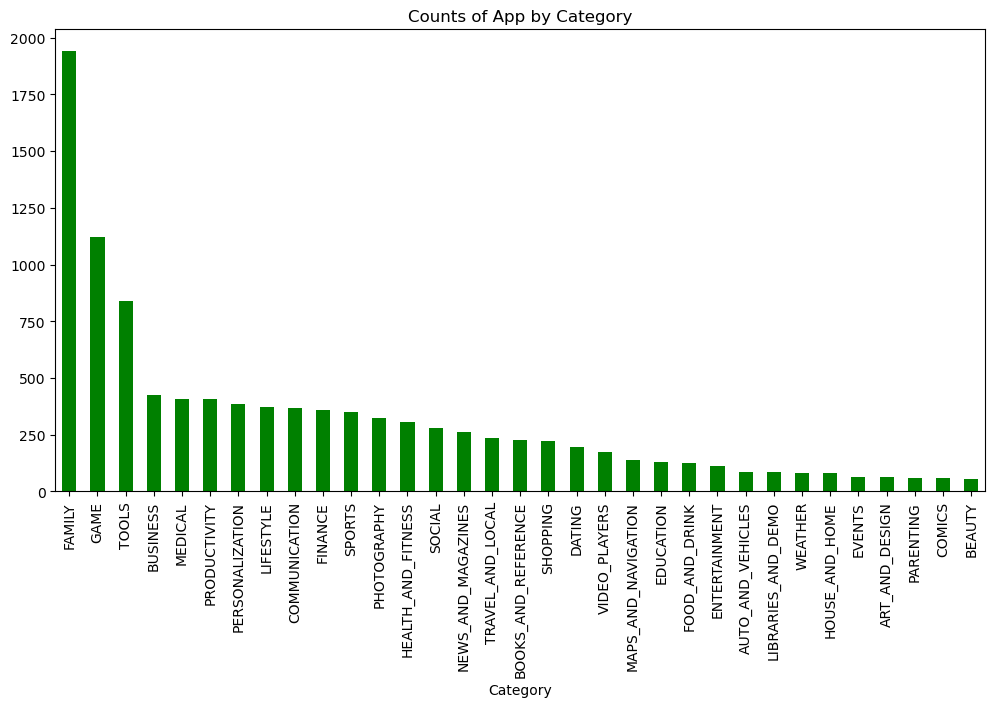

In [27]:
df_cleaned.groupby('Category')['App'].count().sort_values(ascending = False).plot(kind = 'bar',figsize=(12,6),color = 'green',title ='Counts of App by Category')

### Top 50 Popular Genres

<Axes: title={'center': 'Top 50 Popular Genres'}, xlabel='Genres'>

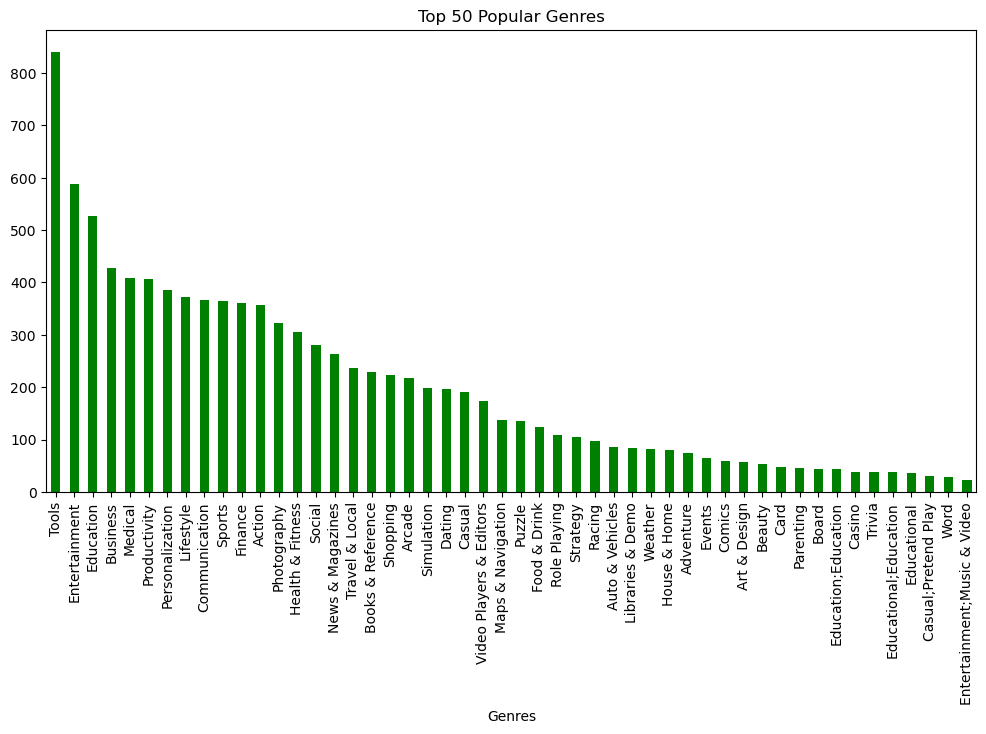

In [33]:
df_cleaned['Genres'].value_counts().sort_values(ascending = False).head(50).plot(kind= 'bar',figsize= (12,6),color = 'green',title ='Top 50 Popular Genres')

In [29]:
df_cleaned.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

### Average Rating by Category

<Axes: xlabel='Category'>

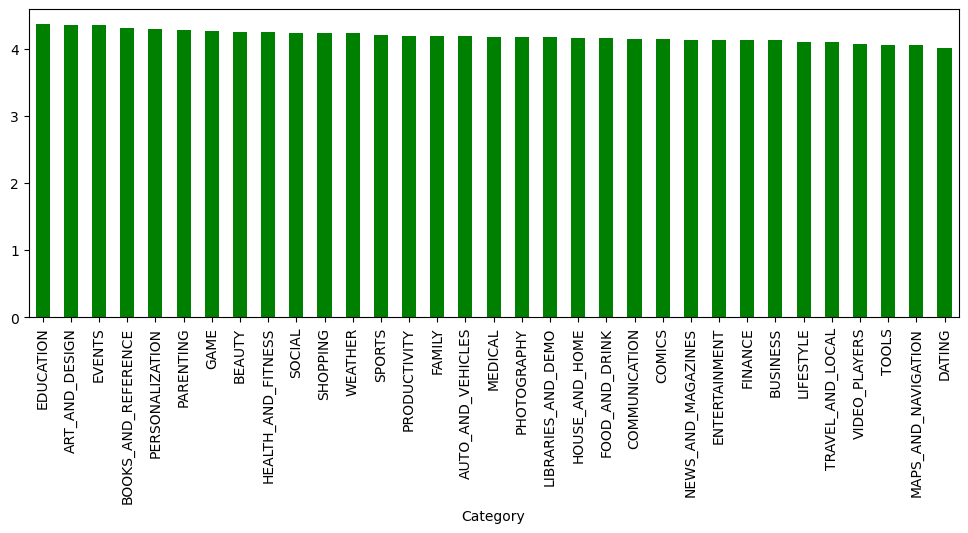

In [31]:
df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False).plot(kind = 'bar',figsize = (12,4),color = 'green')

## 10 Most popular apps

In [54]:
df_cleaned[['App','Installs']].sort_values(by='Installs',ascending = False).head(10)

,App,Installs
336,WhatsApp Messenger,1000000000
2554,Google+,1000000000
3127,Google Street View,1000000000
3816,Google News,1000000000
3223,Maps - Navigate & Explore,1000000000
2545,Instagram,1000000000
2544,Facebook,1000000000
865,Google Play Games,1000000000
3234,Google,1000000000
3736,Google News,1000000000


## List of apps that had installed in the highest number

In [48]:
df_cleaned[['App','Installs']][df_cleaned['Installs']>= 1000000000]

,App,Installs
152,Google Play Books,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
336,WhatsApp Messenger,1000000000
338,Google Chrome: Fast & Secure,1000000000
340,Gmail,1000000000
341,Hangouts,1000000000
382,Messenger – Text and Video Chat for Free,1000000000
386,Hangouts,1000000000
391,Skype - free IM & video calls,1000000000
411,Google Chrome: Fast & Secure,1000000000


In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int32         
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  int32         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.0+ MB
